### (0 баллов) Считываем данные

In [ ]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [ ]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [ ]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds

array([29.3639579 , 36.18916482, 14.05923305, 24.76681233, 18.79788306,
       23.24853399, 17.67925163, 13.52689687, 23.47852891, 20.64157306,
       25.09931716, 18.95745403, -5.20884417, 21.49578209, 19.70582791,
       25.88188533, 20.58810146,  6.32255133, 40.53496182, 17.70625559,
       27.18358564, 30.26489811, 11.44273418, 23.67928093, 18.3134012 ,
       16.68382624, 22.70408601, 15.00807515, 22.63999482, 19.26595697,
       23.18874623, 25.13865453, 25.45744382, 18.65563   , 17.14694386,
       17.09774591, 30.86149933, 20.30925718, 23.6643961 , 24.16999127,
       14.02229608, 32.76422241, 42.75995463, 17.52640822, 27.33820148,
       17.4795262 , 14.37833428, 25.34949499, 20.51753419, 30.15497476,
       21.71831626])

### (2 балл) Валидация результата

Напишите свою функцию MSE и посчитайте своей результат на тестовой части.

In [ ]:
def MSE(y_real, y_pred):
    return np.sum(np.square(y_real - y_pred)) / y_real.shape

In [ ]:
MSE(y_test, preds)

array([14.99585288])

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
class NaiveAlgorithm():
  def fit(self, X, y):
    self.value = np.mean(y)

  def predict(self, X):
    return np.full(X.shape[0], self.value)

In [ ]:
naive_model = NaiveAlgorithm()
naive_model.fit(X_train, y_train)
naive_preds = naive_model.predict(X_test)
print('Результат наивного алгоритма:', MSE(y_test, naive_preds))
print('Результат линейной регрессии:', MSE(y_test, preds))

Результат наивного алгоритма: [65.00802631]
Результат линейной регрессии: [14.99585288]


Линейная регрессия показывает более хорошие результаты по сравнению с наивным алгоритмом.

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [ ]:
losses = []

for alpha in np.arange(0.1, 3.1, 0.1):
  reg_model = Ridge(alpha=alpha)
  reg_model.fit(X_train, y_train)
  preds = reg_model.predict(X_test)
  loss = MSE(y_test, preds)
  losses.append((alpha, loss))

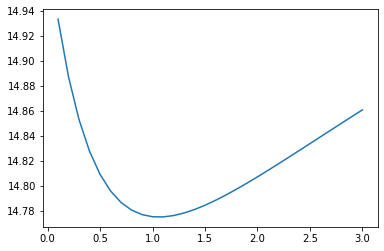

In [ ]:
plt.plot(list(map(lambda x: x[0], losses)), list(map(lambda x: x[1], losses)))

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка?

In [ ]:
score = sorted(losses, key=lambda x: x[1])[0]
print('Лучший коэффициент регуляризации:', score[0])
print('Лучший результат с регуляризацией:', score[1])

Лучший коэффициент регуляризации: 1.1
Лучший результат с регуляризацией: [14.77529647]


Вывод: да, регуляризация помогает, лосс уменьшился.